#  ***The Spark Foundation***

# Name :- Nilesh Shashikant Patil

## Task3:- Exploratory Data Analysis- Retail

#### Problem Statement: Perform 'Exploratory Data Analysis' on 'Sample Superstore' Dataset

In [1]:
# Importing necessary libraries
import numpy as np  
import pandas as pd          
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
sample_sup = pd.read_csv("Downloads/SampleSuperstore.csv") 

In [3]:
sample_sup.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Checking row & column of dataset
sample_sup.shape

(9994, 13)

In [5]:
sample_sup.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
sample_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
sample_sup.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## There are no null values present in dataset

In [8]:
sample_sup.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
sample_sup['Country'].unique()

array(['United States'], dtype=object)

**Postal Code does not carry any information, so that we will drop "Postal Code" from the dataset and as dataset is of United States only, so we can also drop "Country" from our dataset.**

In [10]:
sample_sup = sample_sup.drop(['Postal Code','Country'], axis=1)

In [11]:
sample_sup.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
import warnings
warnings.filterwarnings('ignore')

#### Let's visualize the relation between 'Sales' and 'Profit'

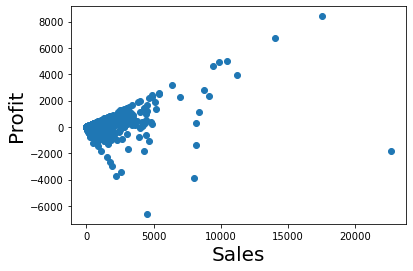

In [13]:
plt.scatter(x=sample_sup.Sales,y=sample_sup.Profit,)
plt.xlabel('Sales', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.show()

From scatter plot, we can say that maximum sales is in between 0 - 6000 and also sometimes when sales increasing, profit is also increased.
## Let's visualize the relation between 'Discount' and 'Profit'.

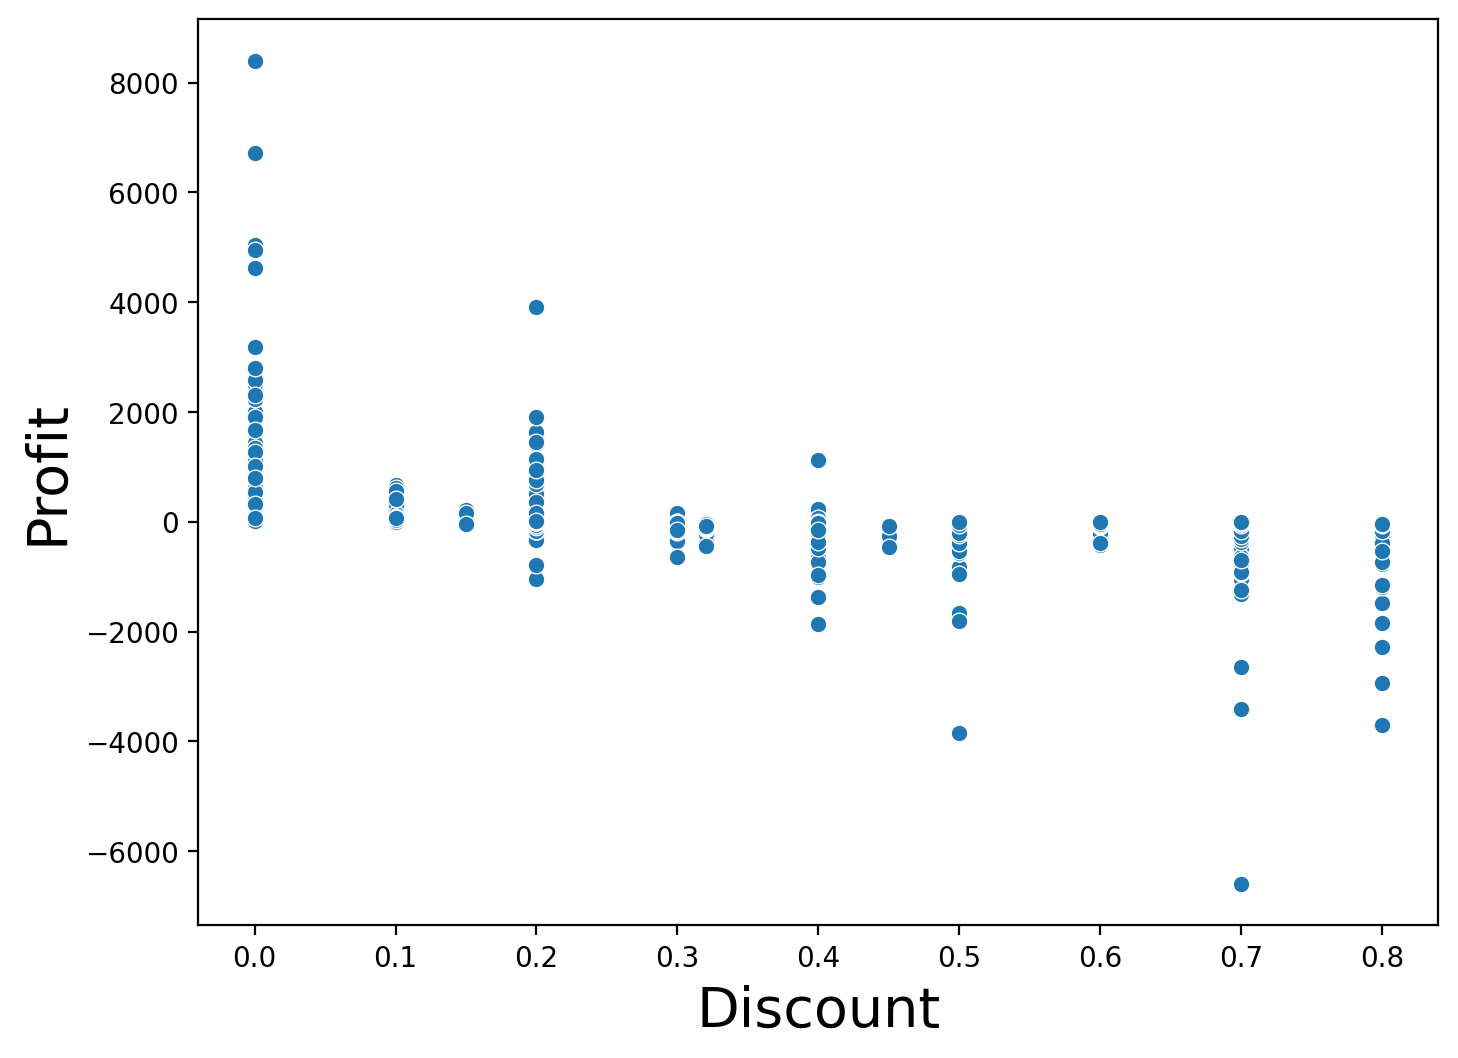

In [14]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(x=sample_sup.Discount,y=sample_sup.Profit,)
plt.xlabel('Discount', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.show()

From above plot, we can say that as discount increases profit Decreases. 

###  Let's check trend of Sales for "Segment"

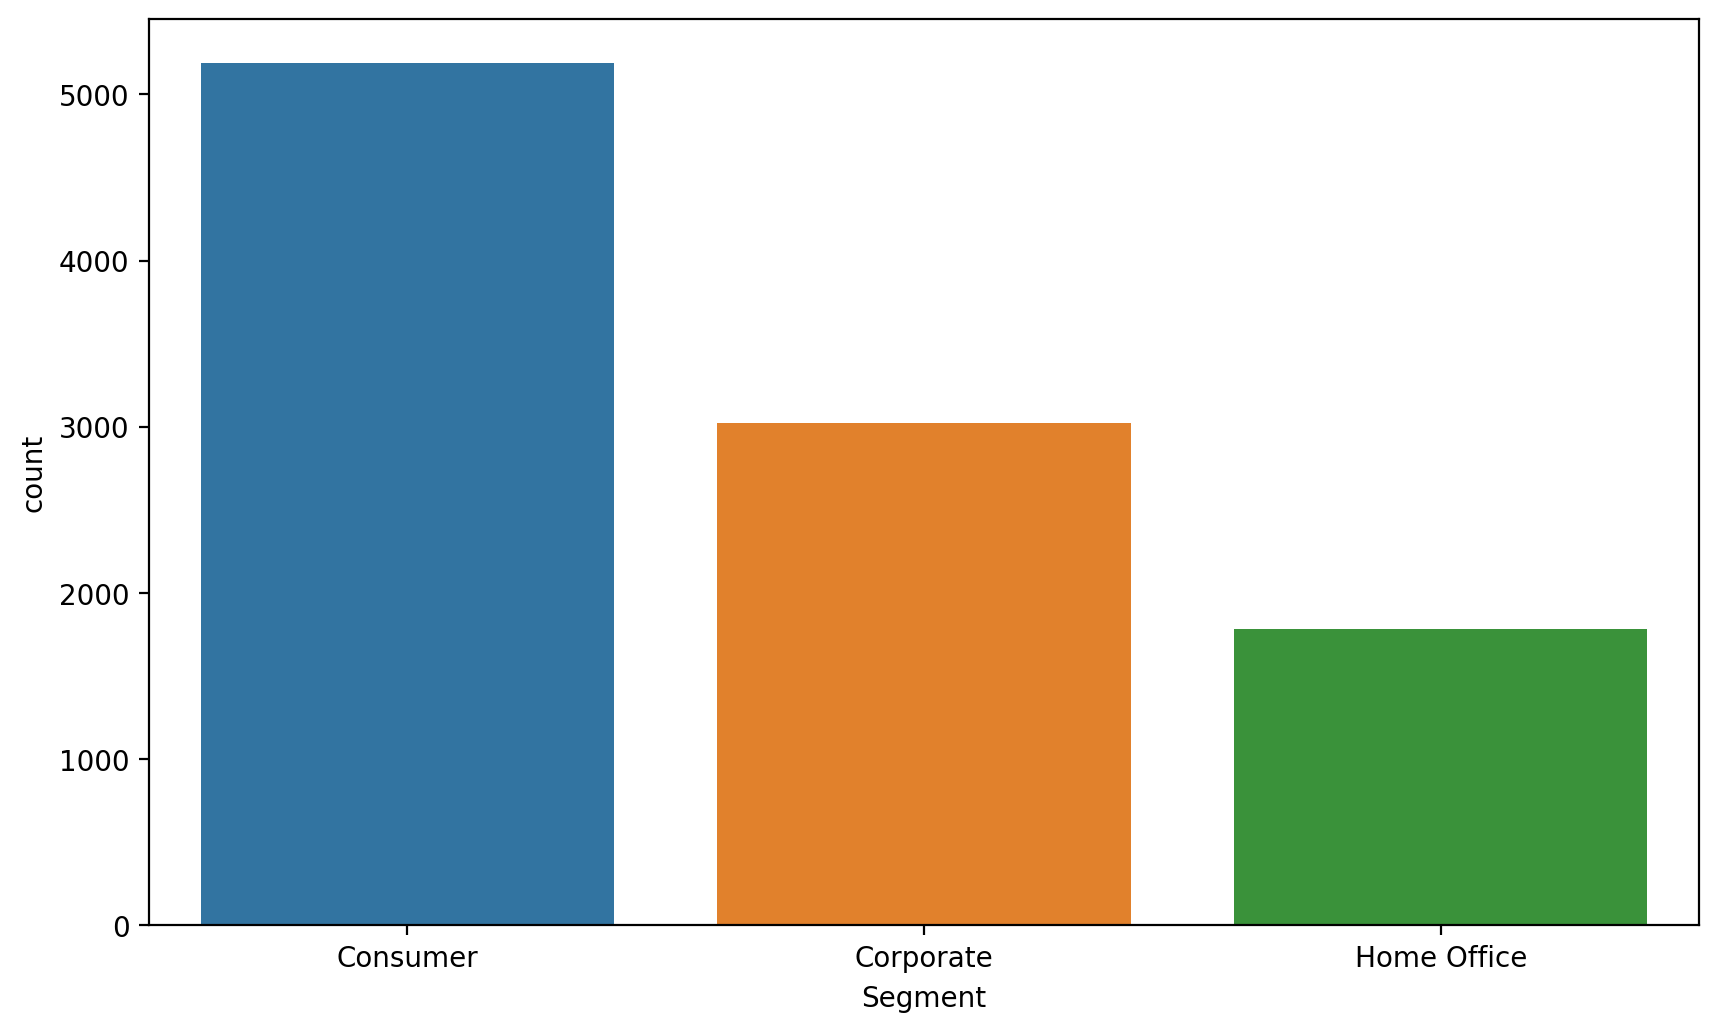

In [15]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(x='Segment', data = sample_sup)
plt.show()

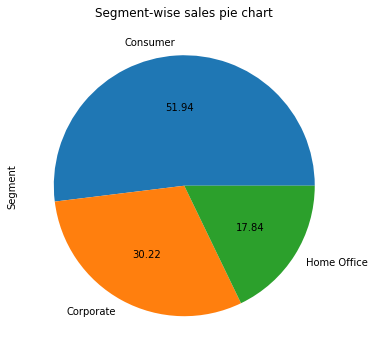

In [16]:
sample_sup['Segment'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f')
plt.title("Segment-wise sales pie chart");

Sales for Consumer segment is more as compared to other two segments.Hence, business should focused more on supplying good service and quality when sale is in consumer segment inorder to increase more sales.

Let's check Region wise trend of Sales

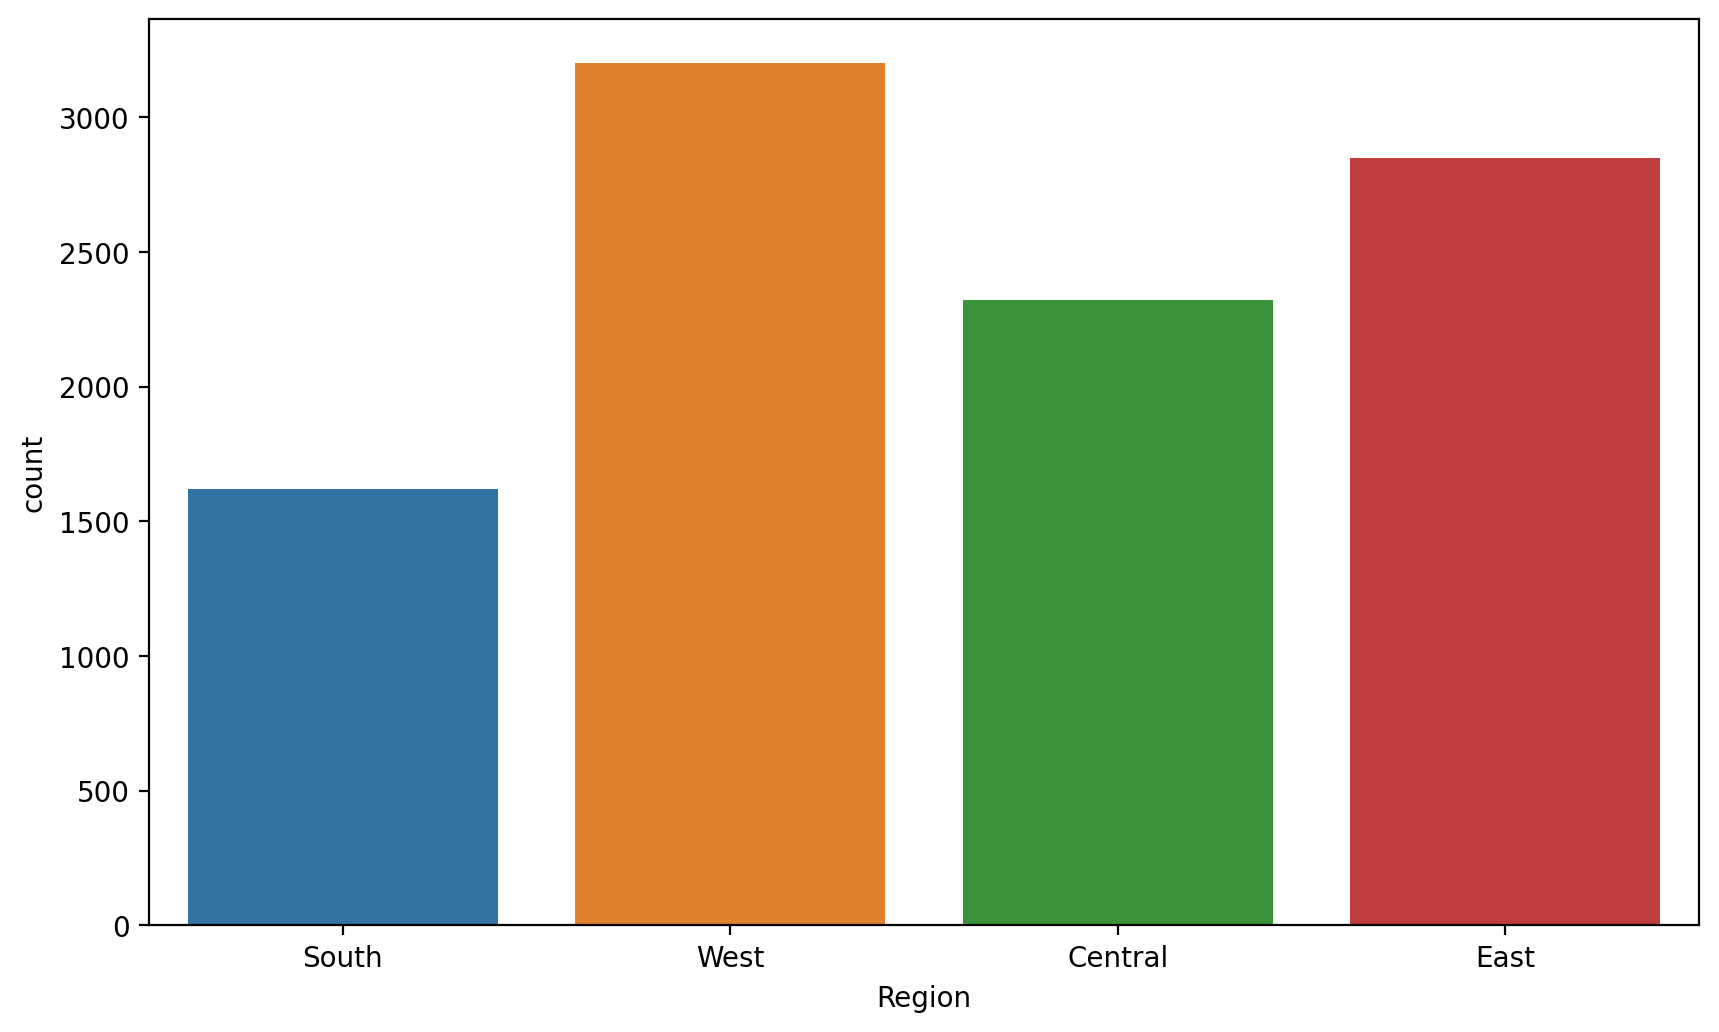

In [17]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(x = "Region", data = sample_sup)
plt.show()

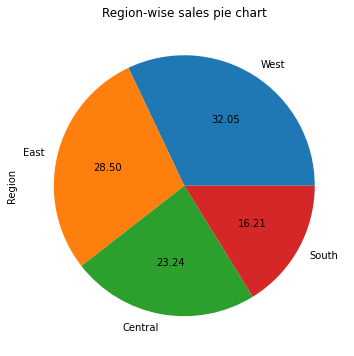

In [18]:
sample_sup['Region'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Region-wise sales pie chart");

"West" and "East" regions buying more products than "South" and "Central".Hence, business should focused on giving good quality products in "west" and "East" region and also business should focused on generating insights behind less sales in "South" and "Central" region.

#### Let's check Category wise trend of Sales

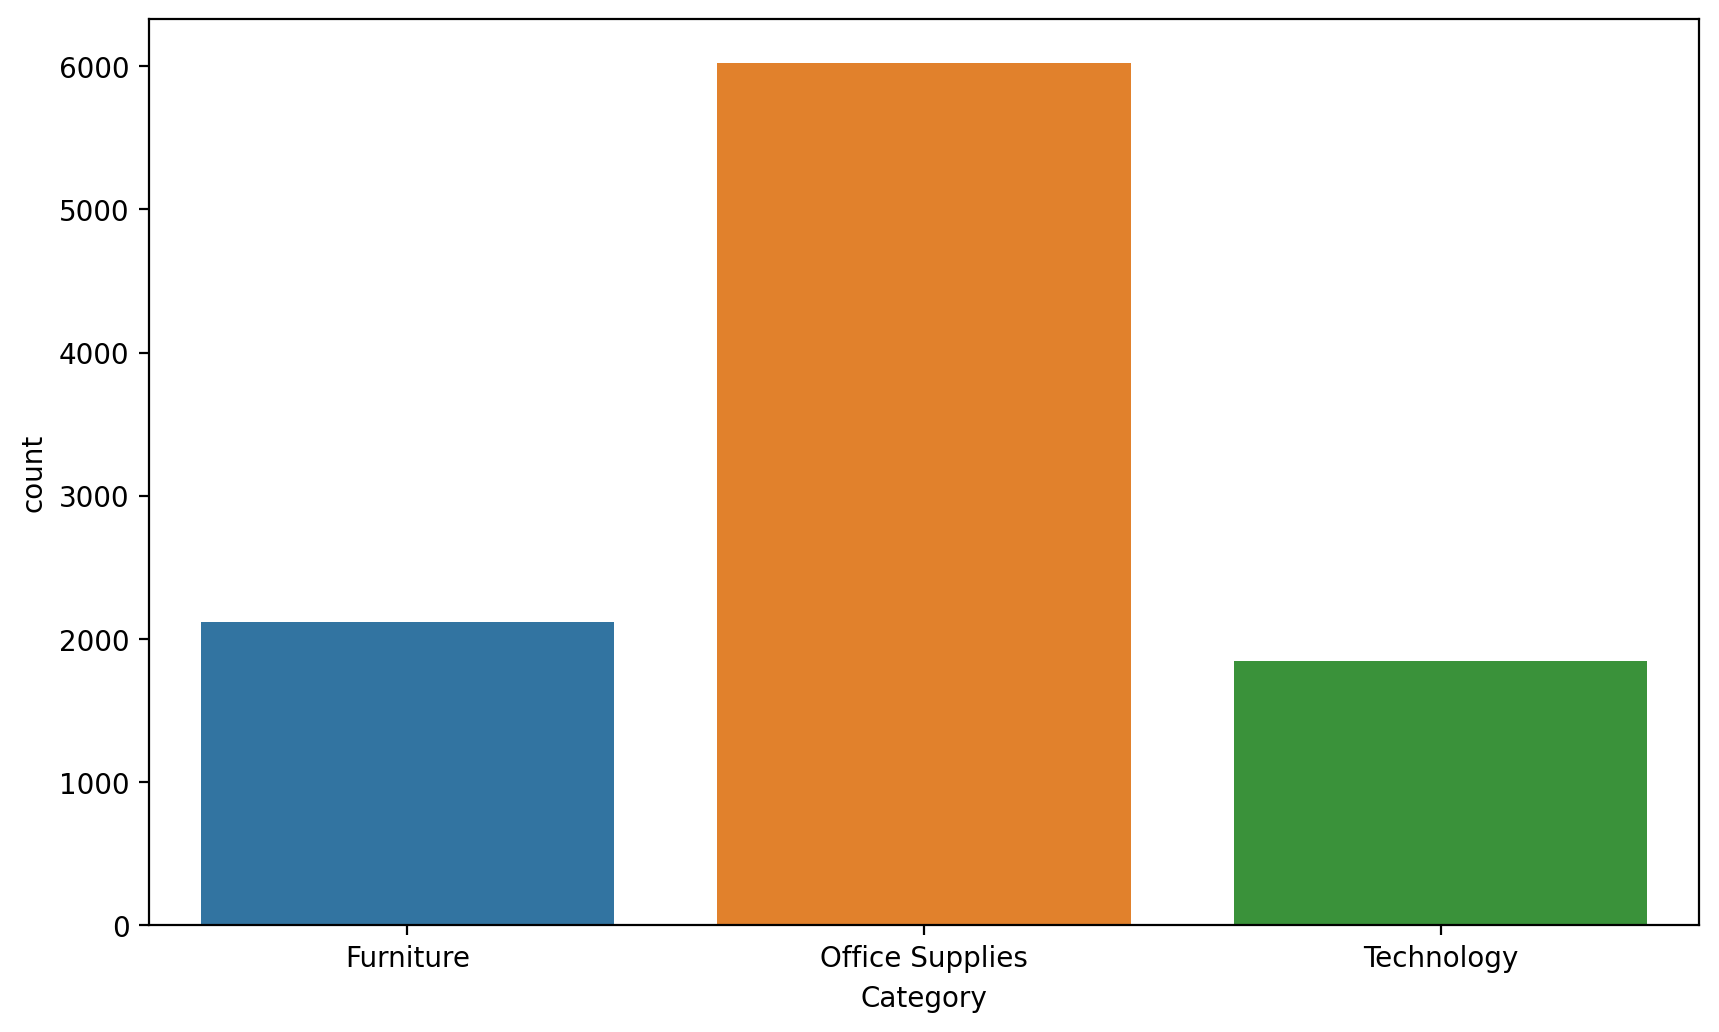

In [25]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(x = "Category", data = sample_sup)
plt.show()

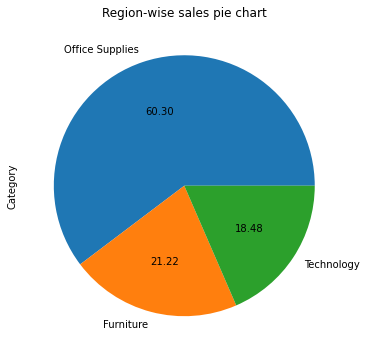

In [20]:
sample_sup['Category'].value_counts().plot.pie(figsize =(6, 6), autopct ='%.2f')
plt.title("Region-wise sales pie chart");

"Office Supplies" category has more profit compared to other categories. Business should be focused on increasing profit in "Furniture" and "Technology".

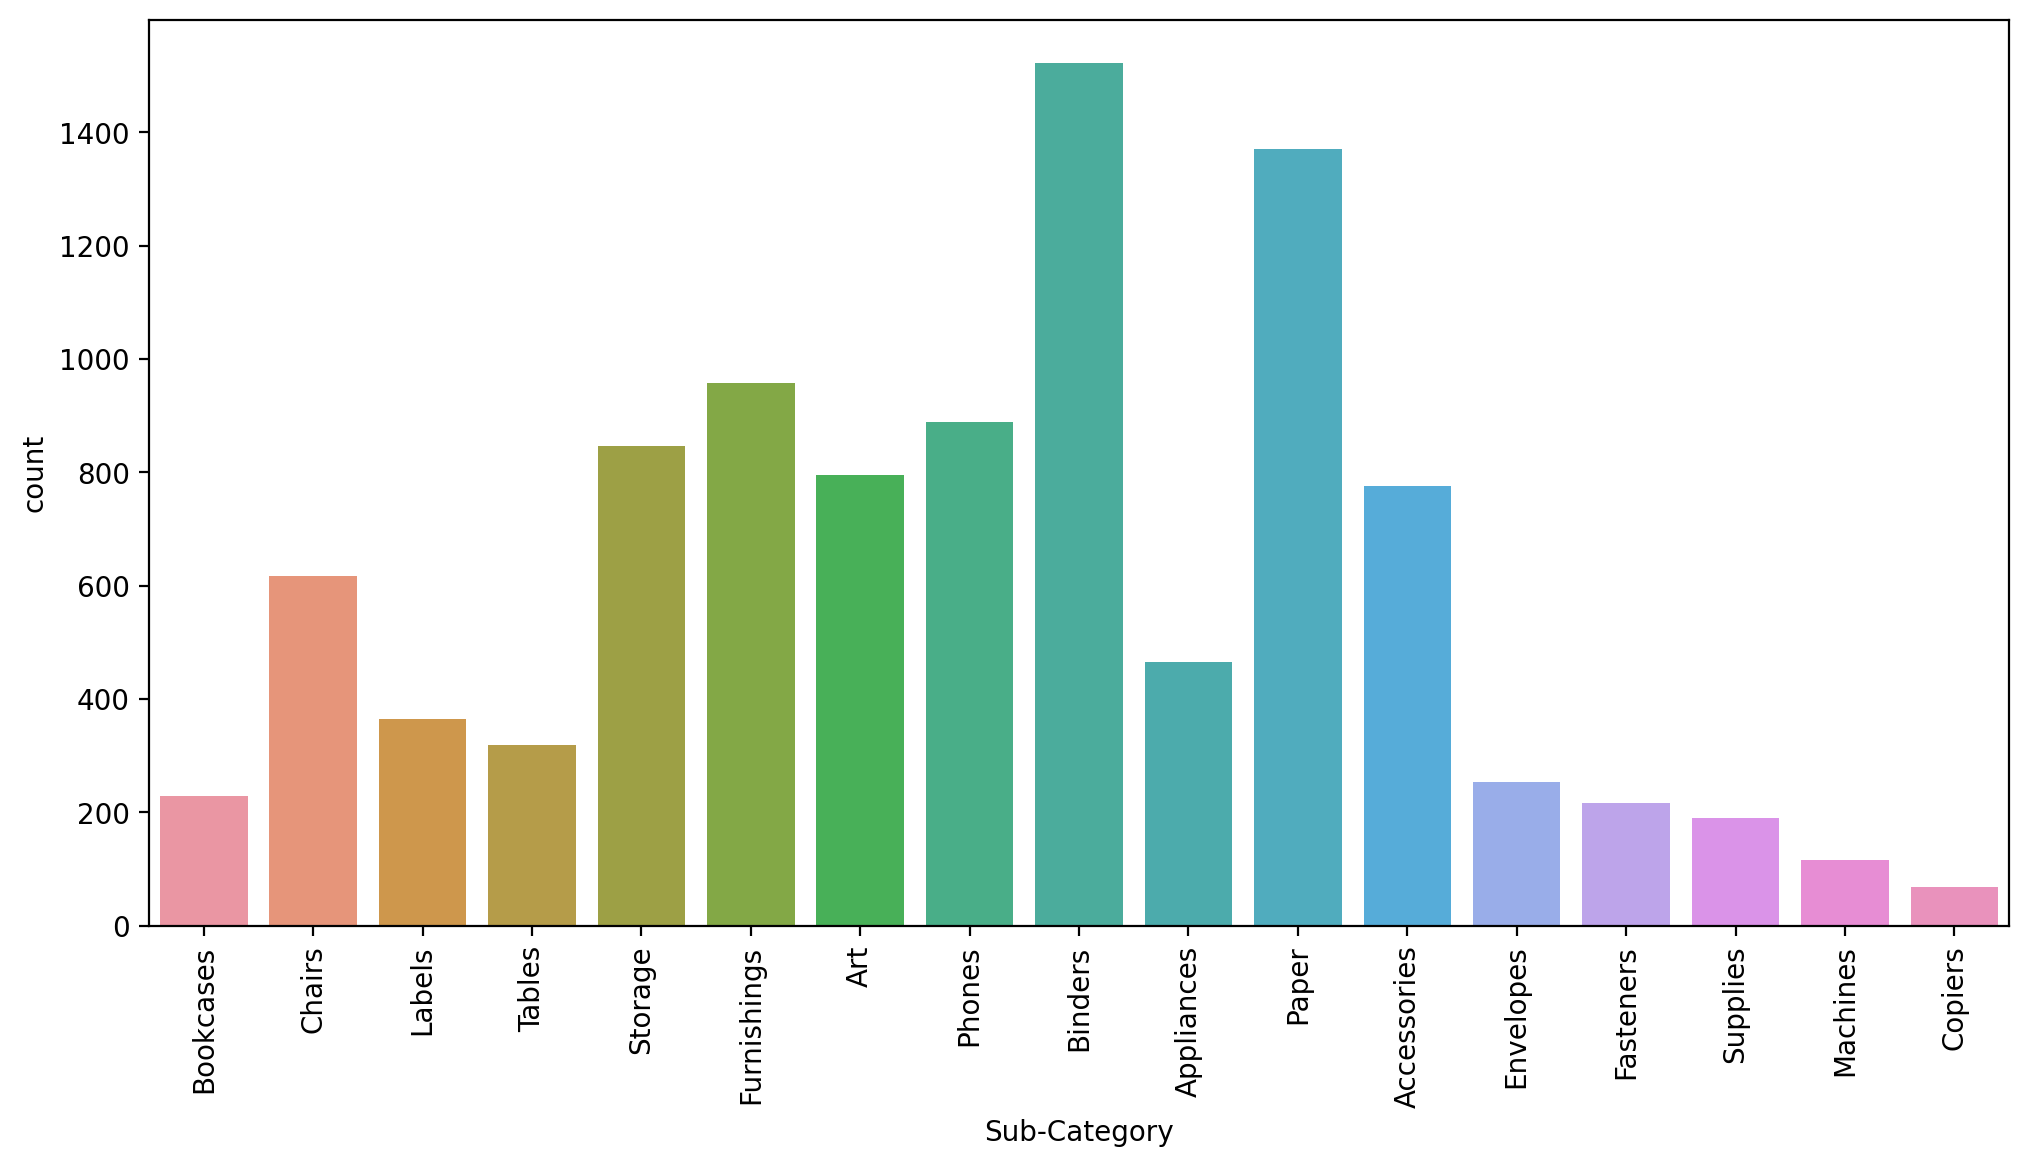

In [27]:
plt.figure(figsize = (12,6),dpi=200)
sns.countplot(x ='Sub-Category', data = sample_sup)
plt.xticks(rotation = (90))
plt.show()

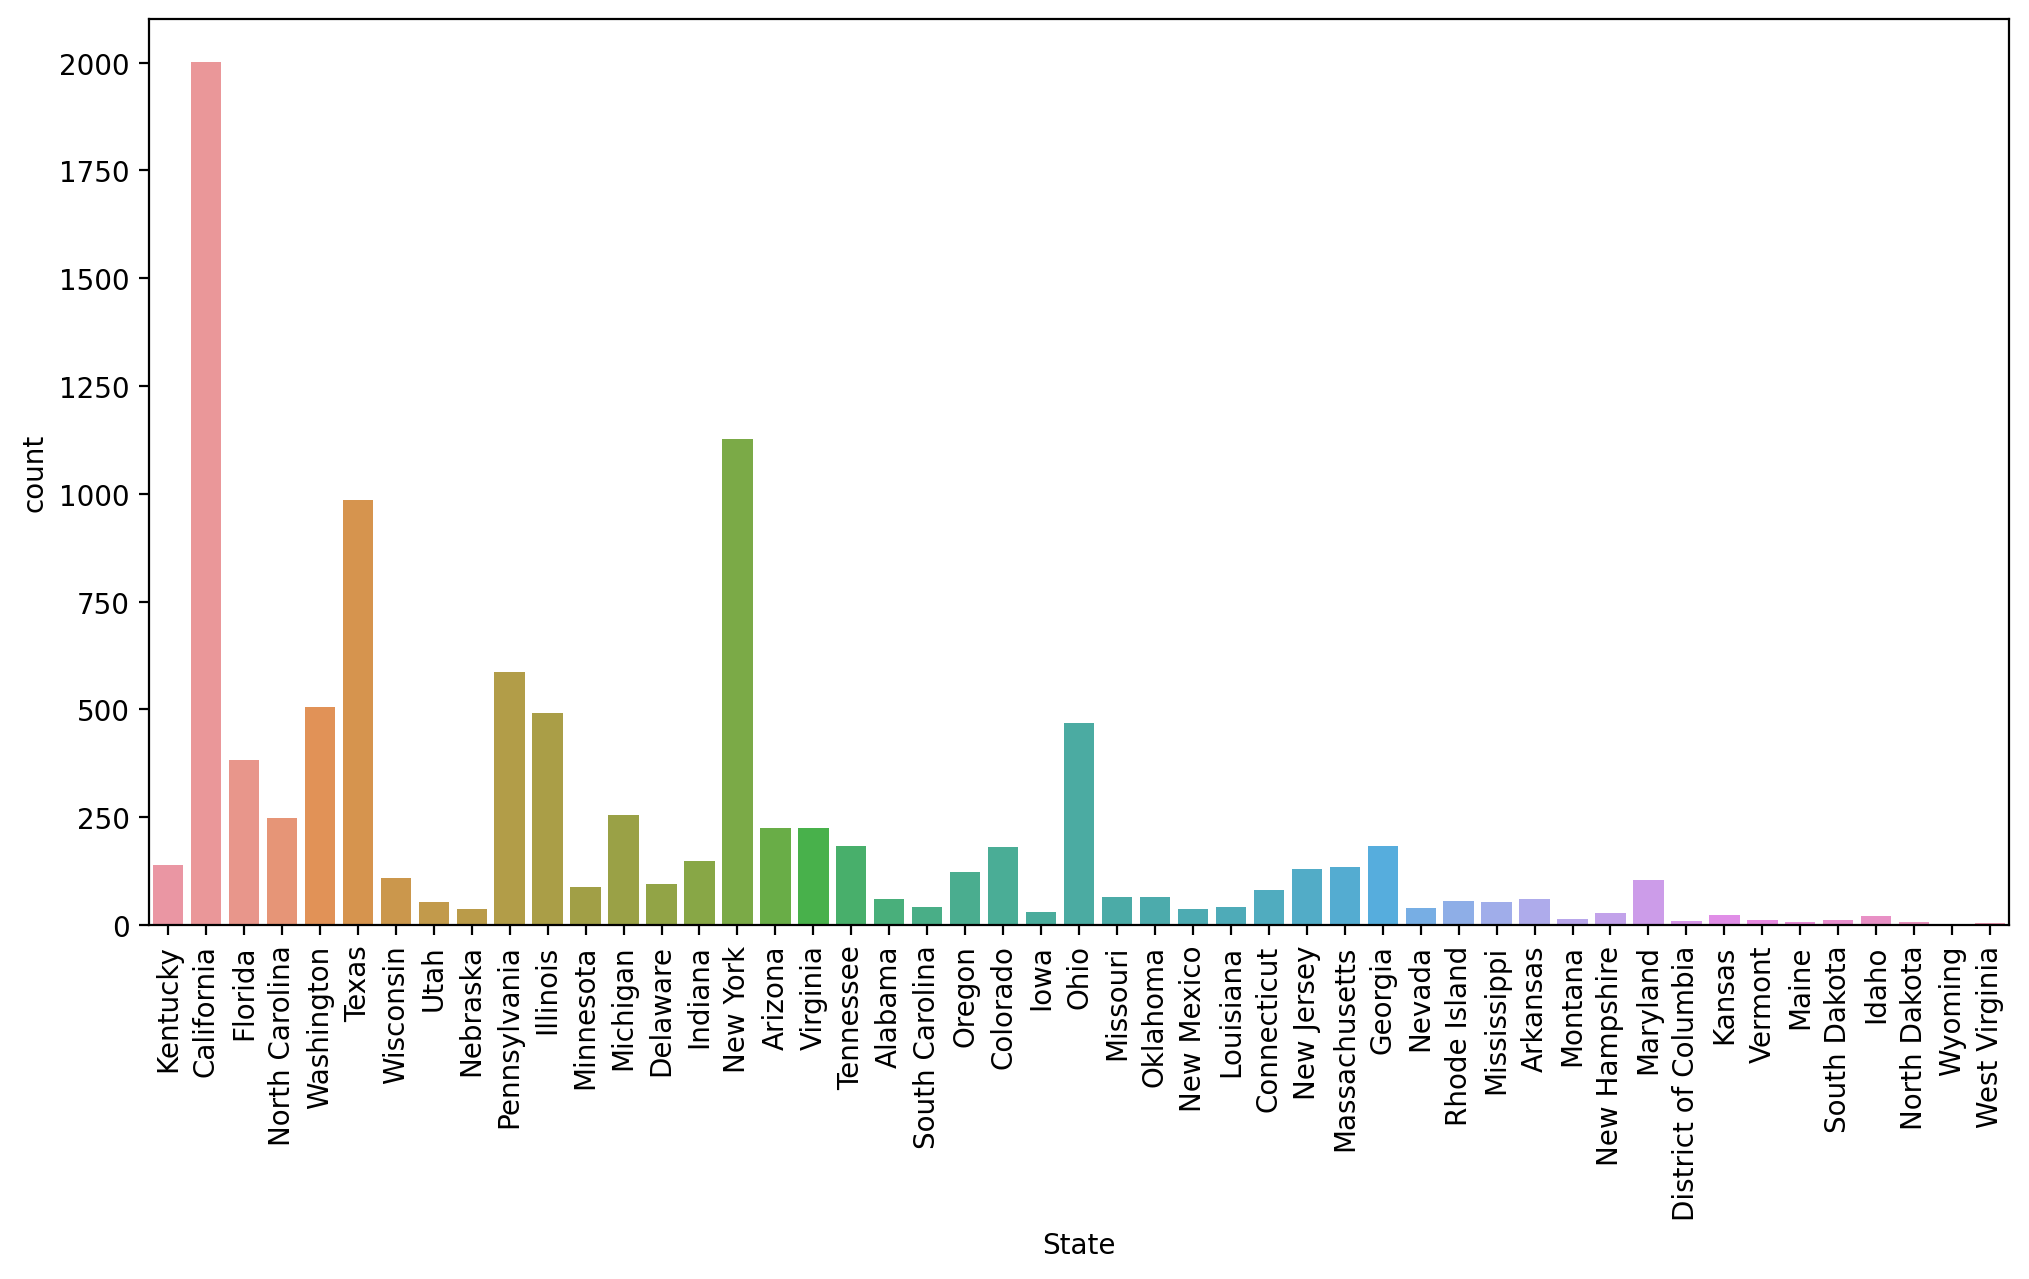

In [22]:
plt.figure(figsize = (12,6),dpi=200)
sns.countplot(x = "State", data = sample_sup)
plt.xticks(rotation = (90))
plt.show()

#### Sales is more in states like California, Washington, Texas, Pennsylvania, lllinois, New York and Ohio. Hence, Company can expand their business in these states to increase profit.

_____